In [360]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


def init_u(n_x, n_t, dx):
    u = np.zeros((n_x, n_t), dtype='float64')
    for i in range(n_x):
        for j in range(n_t):
            x = dx * i
            if i == 0 or i == n_x - 1:
                u[i, j] = 0
            else:
                u[i, j] = x * (1 - x)
    return u


def init_l(n_x, dx):
    l = np.zeros((n_x, n_x))
    for i in range(n_x):
        for j in range(n_x):
            if abs(i - j) == 1:
                l[i, j] = 1
            elif i == j:
                l[i, j] = -2
    l /= (dx ** 2)
    return l


def simulate(simulator, initial, step_num):
    import copy
    import time
    s = time.time()
    u = copy.deepcopy(initial)
    ret = [u]
    for i in range(step_num):
        u = simulator.step(u)
        ret.append(u)
    elapsed_time = time.time() - s
    return np.array(ret), elapsed_time


class Euler:
    def __init__(self, dt, dx):
        self.dt = dt
        self.dx = dx

    def step(self, u, m, n, x, t):
        return u[m, n] + self.dt * (
                (u[m + 1, n] - 2 * u[m, n] + u[m - 1, n]) / (self.dx ** 2) +
                2 * u[m, n] / (x * (1 - x)) - x * (1 - x) * np.math.sin(t))


class ExponentialEuler:
    def __init__(self, l, dt):
        self.l = l
        self.dt = dt

    def step(self, u, x, t):
        return u + self.dt * np.linalg.inv(np.eye(len(self.l[0])) - self.dt / 2 * self.l).dot(
            self.f(u, x, t))

    def f(self, u, x, t):
        if t == 0:
            return x * (1 - x)
        return np.where(x * (1 - x) == 0, 0,
                        self.l.dot(u) + 2 * u / (x * (1 - x)) - x * (1 - x) * np.math.sin(t))


class RosenbrockEuler:
    def __init__(self, l, x, dt):
        self.l = l
        self.ln = np.where(x * (1 - x) == 0, l, l + 2 / (x * (1 - x)))
        self.dt = dt

    def step(self, u, x, t):
        return u + self.dt * np.linalg.pinv(self.dt * self.ln).dot(
            np.linalg.pinv(np.eye(len(self.l[0])) - (self.dt * self.ln / 2)).dot(
                np.eye(len(self.l[0])) + (self.dt * self.ln / 2)) - np.eye(len(self.l[0]))).dot(
            self.f(u, x, t))

    def f(self, u, x, t):
        if t == 0:
            return x * (1 - x)
        return np.where(x * (1 - x) == 0, 0,
                        self.l.dot(u) + 2 * u / (x * (1 - x)) - x * (1 - x) * np.math.sin(t))

In [361]:
def init_t(n_t):
    n_x = 11
    dx = 1 / (n_x - 1)
    dt = np.math.pi / (n_t - 1)
    return n_t, n_x, dx, dt


def do_euler():
    l = init_l(n_x, dx)
    u = init_u(n_x, n_t, dx)

    euler = Euler(dt, dx)
    for j in range(n_t - 1):
        for i in range(1, n_x - 1):
            u[i, j + 1] = euler.step(u, i, j, dx * i, dt * j)
        if j % ((n_t - 1) / 10) == 0:
            plt.plot(u[:, j], label=j)

    plt.legend()

    
def do_exponential_euler():
    exponential_euler = ExponentialEuler(l, dt)
    u = init_u(n_x, n_t, dx)
    x = np.linspace(0, 1, n_x)
    for j in range(0, n_t - 1):
        u[:, j + 1] = exponential_euler.step(u[:, j], x, dt * j)
        if j % ((n_t - 1) / 10) == 0:
            plt.plot(u[:, j], label=j)

    plt.legend()

    
def do_rosenbrock_euler():    
    l = init_l(n_x, dx)
    u = init_u(n_x, n_t, dx)
    x = np.linspace(0, 1, n_x)
    rosenbrock = RosenbrockEuler(l, x, dt)
    for j in range(0, n_t - 1):
        u[:, j + 1] = rosenbrock.step(u[:, j], x, dt * j)
        if j % ((n_t - 1) / 10) == 0:
            plt.plot(u[:, j], label=j)

    plt.legend()

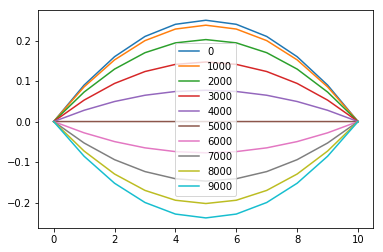

In [362]:
n_t, n_x, dx, dt = init_t(10001)
do_euler()

/Users/hiramekun/SML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide


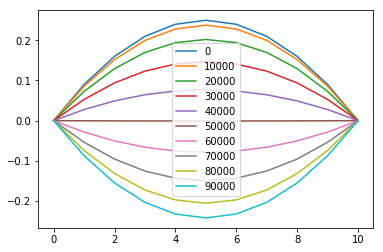

In [355]:
do_exponential_euler()

/Users/hiramekun/SML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
/Users/hiramekun/SML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in true_divide


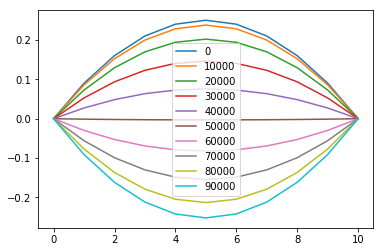

In [356]:
do_rosenbrock_euler()

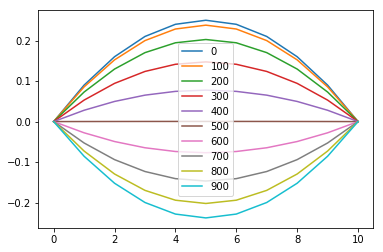

In [364]:
n_t, n_x, dx, dt = init_t(1001)
do_euler()

/Users/hiramekun/SML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide


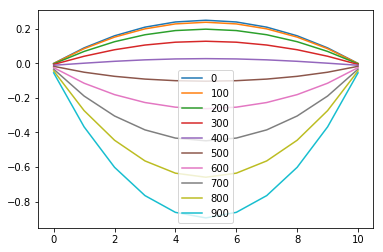

In [365]:
do_exponential_euler()

/Users/hiramekun/SML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
/Users/hiramekun/SML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in true_divide


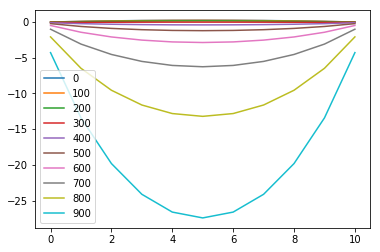

In [366]:
do_rosenbrock_euler()

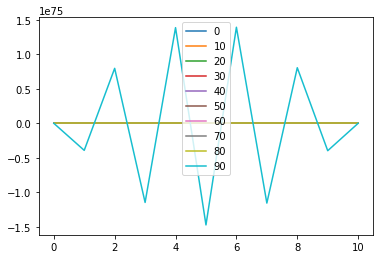

In [367]:
n_t, n_x, dx, dt = init_t(101)
do_euler()